
Training No Regularization Model...
Epoch 0 | Loss=0.6931 | Accuracy=0.7313
Epoch 50 | Loss=0.6439 | Accuracy=0.7345
Epoch 100 | Loss=0.6098 | Accuracy=0.7362
Epoch 150 | Loss=0.5854 | Accuracy=0.7394
Epoch 200 | Loss=0.5675 | Accuracy=0.7394
Epoch 250 | Loss=0.5538 | Accuracy=0.7410
Epoch 300 | Loss=0.5432 | Accuracy=0.7410
Epoch 350 | Loss=0.5347 | Accuracy=0.7394
Epoch 400 | Loss=0.5279 | Accuracy=0.7427
Epoch 450 | Loss=0.5223 | Accuracy=0.7443
Epoch 500 | Loss=0.5176 | Accuracy=0.7476
Epoch 550 | Loss=0.5137 | Accuracy=0.7524
Epoch 600 | Loss=0.5103 | Accuracy=0.7541
Epoch 650 | Loss=0.5075 | Accuracy=0.7606
Epoch 700 | Loss=0.5051 | Accuracy=0.7622
Epoch 750 | Loss=0.5030 | Accuracy=0.7638
Epoch 800 | Loss=0.5012 | Accuracy=0.7638
Epoch 850 | Loss=0.4996 | Accuracy=0.7606
Epoch 900 | Loss=0.4982 | Accuracy=0.7590
Epoch 950 | Loss=0.4969 | Accuracy=0.7573

Training L1 Regularization Model...

Training L2 Regularization Model...

📌 Model Comparison:

               Model  Train Ac

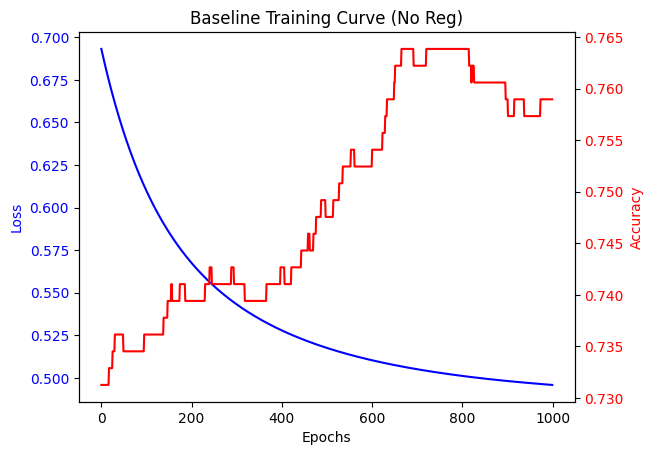

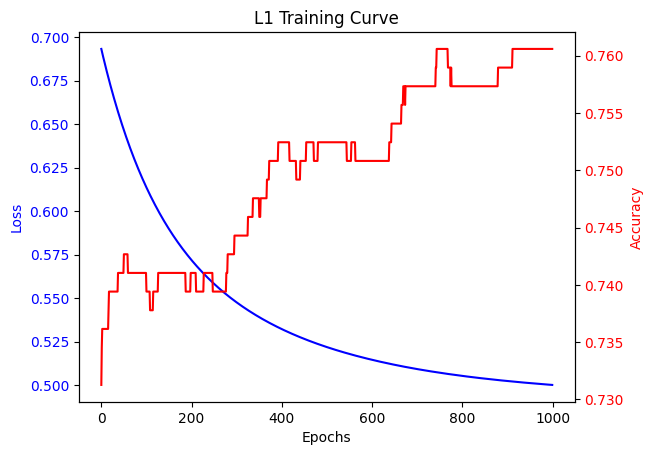

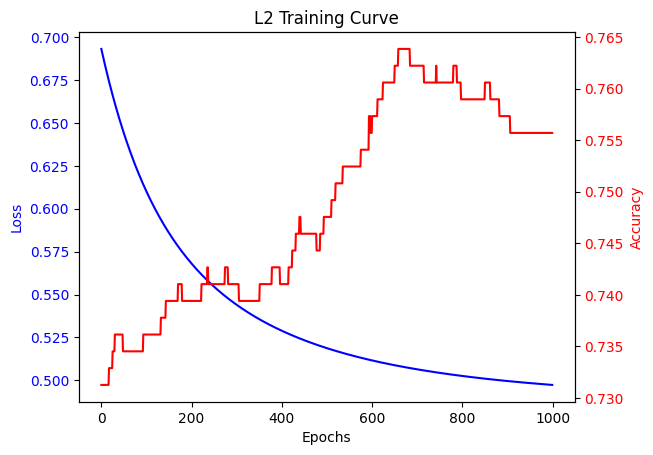

In [26]:
# ------------------------------
# Imports
# ------------------------------
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ------------------------------
# Helper Functions
# ------------------------------

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, w, b):
    """Vectorized prediction for multiple samples."""
    return (sigmoid(np.dot(X, w) + b) >= 0.5).astype(int)

def plot_training_curve(loss, accuracy, title):
    fig, ax1 = plt.subplots()
    ax1.plot(loss, color='blue', label='Loss')
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(accuracy, color='red', label='Accuracy')
    ax2.set_ylabel("Accuracy", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title(title)
    plt.show()


# ------------------------------
# Training Functions
# ------------------------------

def fit(X, y, epochs, lr):
    """Logistic Regression without regularization."""
    m, n = X.shape
    w = np.zeros(n)
    b = 0

    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        y_pred = sigmoid(np.dot(X, w) + b)

        dw = np.dot(X.T, (y_pred - y)) / m
        db = np.mean(y_pred - y)

        w -= lr * dw
        b -= lr * db

        cost = -(1/m) * np.sum(
            y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9)
        )
        loss_history.append(cost)

        accuracy_history.append(np.mean(predict(X, w, b) == y))

        if epoch % 50 == 0:
            print(f"Epoch {epoch} | Loss={cost:.4f} | Accuracy={accuracy_history[-1]:.4f}")

    return w, b, loss_history, accuracy_history


def fit_with_L1(X, y, epochs, lr, lambda_=0.01):
    """Logistic Regression with L1 Regularization."""
    m, n = X.shape
    w = np.zeros(n)
    b = 0

    loss_history, accuracy_history = [], []

    for epoch in range(epochs):
        y_pred = sigmoid(np.dot(X, w) + b)

        dw = (np.dot(X.T, (y_pred - y)) / m) + lambda_ * np.sign(w)
        db = np.mean(y_pred - y)

        w -= lr * dw
        b -= lr * db

        cost = -(1/m) * np.sum(
            y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9)
        )
        loss_history.append(cost)
        accuracy_history.append(np.mean(predict(X, w, b) == y))

    return w, b, loss_history, accuracy_history


def fit_with_L2(X, y, epochs, lr, lambda_=0.01):
    """Logistic Regression with L2 Regularization."""
    m, n = X.shape
    w = np.zeros(n)
    b = 0

    loss_history, accuracy_history = [], []

    for epoch in range(epochs):
        y_pred = sigmoid(np.dot(X, w) + b)

        dw = (np.dot(X.T, (y_pred - y)) / m) + lambda_ * w
        db = np.mean(y_pred - y)

        w -= lr * dw
        b -= lr * db

        cost = -(1/m) * np.sum(
            y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9)
        )
        loss_history.append(cost)
        accuracy_history.append(np.mean(predict(X, w, b) == y))

    return w, b, loss_history, accuracy_history


# ------------------------------
# Load & Prepare Data
# ------------------------------

df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

y = df["Outcome"].values
X = df.drop("Outcome", axis=1).values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# ------------------------------
# Train Models
# ------------------------------

print("\nTraining No Regularization Model...")
w0, b0, loss0, acc0 = fit(X_train, y_train, epochs=1000, lr=0.01)

print("\nTraining L1 Regularization Model...")
w1, b1, loss1, acc1 = fit_with_L1(X_train, y_train, epochs=1000, lr=0.01)

print("\nTraining L2 Regularization Model...")
w2, b2, loss2, acc2 = fit_with_L2(X_train, y_train, epochs=1000, lr=0.01)


# ------------------------------
# Evaluation + Comparison Table
# ------------------------------

results = [
    ["No Regularization", acc0[-1], np.mean(predict(X_test, w0, b0) == y_test), np.linalg.norm(w0), np.sum(w0 == 0)],
    ["L1 Regularization", acc1[-1], np.mean(predict(X_test, w1, b1) == y_test), np.linalg.norm(w1), np.sum(w1 == 0)],
    ["L2 Regularization", acc2[-1], np.mean(predict(X_test, w2, b2) == y_test), np.linalg.norm(w2), np.sum(w2 == 0)]
]

comparison_df = pd.DataFrame(results, columns=["Model", "Train Acc", "Test Acc", "||w||", "Zero Weights"])
print("\n📌 Model Comparison:\n")
print(comparison_df)


# ------------------------------
# Plot curves
# ------------------------------

plot_training_curve(loss0, acc0, "Baseline Training Curve (No Reg)")
plot_training_curve(loss1, acc1, "L1 Training Curve")
plot_training_curve(loss2, acc2, "L2 Training Curve")